In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.head()
accuracy=[]

In [2]:
dataset.id.shape

(5110,)

In [3]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
dataset.dropna(subset=['bmi'], inplace=False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.drop('id',
  axis='columns', inplace=True)
dataset["bmi"] = dataset["bmi"].replace(np.NaN, dataset["bmi"].mean())

In [6]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [7]:
dataset["gender"] = [1 if x=="Male" else 0 for x in dataset["gender"]]
dataset["Residence_type"] = [1 if x=="Urban" else 0 for x in dataset["Residence_type"]]
dataset["ever_married"] = [1 if x=="Yes" else 0 for x in dataset["ever_married"]]
map_1 = {'never smoked':0, 'formerly smoked':1, 'smokes':2, 'Unknown':3}
dataset['smoking_status'] = dataset['smoking_status'].map(map_1)
map_2={'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}
dataset['work_type'] = dataset['work_type'].map(map_2)


In [8]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,0,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,1,0,174.12,24.000000,0,1


In [9]:
dataset.describe(include = 'all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,0.837965,0.508023,106.147677,28.893237,1.388454,0.048728
std,0.492578,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.698018,1.258047,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.885000,28.400000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.800000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [10]:
dataset.drop(['heart_disease'], axis=1)

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,1,228.69,36.600000,1,1
1,0,61.0,0,1,1,0,202.21,28.893237,0,1
2,1,80.0,0,1,0,0,105.92,32.500000,0,1
3,0,49.0,0,1,0,1,171.23,34.400000,2,1
4,0,79.0,1,1,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,1,0,1,83.75,28.893237,0,0
5106,0,81.0,0,1,1,1,125.20,40.000000,0,0
5107,0,35.0,0,1,1,0,82.99,30.600000,0,0
5108,1,51.0,0,1,0,0,166.29,25.600000,1,0


In [11]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,0,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.893237,0,0
5106,0,81.0,0,0,1,1,1,125.20,40.000000,0,0
5107,0,35.0,0,0,1,1,0,82.99,30.600000,0,0
5108,1,51.0,0,0,1,0,0,166.29,25.600000,1,0


In [12]:
X = dataset.drop(['heart_disease',"stroke"],axis =1)
#index = ['hypertension', 'ever_married']
y = dataset['stroke']

In [13]:
X

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,0,1,228.69,36.600000,1
1,0,61.0,0,1,1,0,202.21,28.893237,0
2,1,80.0,0,1,0,0,105.92,32.500000,0
3,0,49.0,0,1,0,1,171.23,34.400000,2
4,0,79.0,1,1,1,0,174.12,24.000000,0
...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,1,0,1,83.75,28.893237,0
5106,0,81.0,0,1,1,1,125.20,40.000000,0
5107,0,35.0,0,1,1,0,82.99,30.600000,0
5108,1,51.0,0,1,0,0,166.29,25.600000,1


In [14]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [16]:
# RF

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 150)
RF.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = RF.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions)*100)
accuracy.append(accuracy_score(y_test, predictions)*100)

[[1217    3]
 [  57    1]]
95.30516431924883


In [18]:
# GradientBoost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
gbdt = GradientBoostingClassifier(random_state = 10)
gbdt.fit(X_train, y_train)
prediction_1 = gbdt.predict(X_test)
print(confusion_matrix(y_test, prediction_1))
print(accuracy_score(y_test, prediction_1)*100)
accuracy.append(accuracy_score(y_test, prediction_1)*100)

[[1214    6]
 [  58    0]]
94.99217527386541


In [21]:
# LR

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100))
accuracy.append(logreg.score(X_test, y_test)*100)

Accuracy of logistic regression classifier on test set: 94.91


In [24]:
# Adaboost

In [25]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [26]:
regressor = AdaBoostRegressor()
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
regressor.fit(X_train,y_train)
pred_y = regressor.predict(X_test)

In [27]:
print(metrics.accuracy_score(y_test, y_pred)*100)
accuracy.append(metrics.accuracy_score(y_test, y_pred)*100)

95.46165884194053


In [28]:
# Decision Tree

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=dataset.drop('stroke',axis=1)
y=dataset['stroke']

In [31]:
X.shape

(5110, 10)

In [32]:
y.shape

(5110,)

In [33]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
regressor.fit(X_train,y_train)
pred_y = regressor.predict(X_test)

In [34]:
X_Train,X_Test,y_Train,y_Test= train_test_split(X,y,test_size=0.25,random_state=123)

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [36]:
X = dataset[["age","hypertension","heart_disease","avg_glucose_level","bmi","gender","work_type","Residence_type","ever_married","smoking_status"]]
y = dataset["stroke"]
X, y = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([-0.39292219, -0.46749346,  0.02768473,  0.06441362, -0.50323135,
        0.16437202,  0.11242982, -0.73798979, -0.30953155, -0.00137327])

In [37]:
dtdt = DecisionTreeClassifier(random_state = 10)
dtdt.fit(X_train, y_train)
prediction_1 = dtdt.predict(X_test)
print(confusion_matrix(y_test, prediction_1))
print(accuracy_score(y_test, prediction_1)*100)
accuracy.append(accuracy_score(y_test, prediction_1)*100)


[[1166   54]
 [  51    7]]
91.78403755868545


In [38]:
accuracy

[95.30516431924883,
 94.99217527386541,
 94.91392801251956,
 95.46165884194053,
 91.78403755868545]

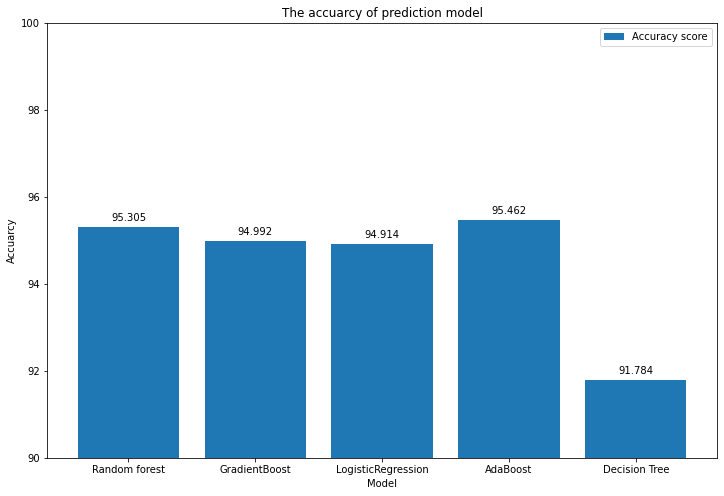

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

plt.bar(['Random forest','GradientBoost','LogisticRegression','AdaBoost','Decision Tree'],
        accuracy, 
        align='center',
        label='Accuracy score')

plt.legend()
plt.ylabel('Accuarcy')
plt.xlabel('Model')
plt.title('The accuarcy of prediction model')
plt.ylim(90,100)
x = ['Random forest','GradientBoost','LogisticRegression','AdaBoost','Decision Tree']
y = accuracy
for a,b in zip(x,y):
 plt.text(a,b+0.1,'%.3f'%b,ha = 'center',va = 'bottom',fontsize=10)
plt.show()



In [40]:
score={'Algorithm':['Random dorest','GradientBoost','Logistic Regression','AdaBoost','Decision Tree']
       ,'Accuracy score':
[95.14866979655712,
 95.22691705790297,
 94.91392801251956,
 95.46165884194053,
 91.78403755868545]}
pd.DataFrame(score)

,Algorithm,Accuracy score
0,Random dorest,95.148670
1,GradientBoost,95.226917
2,Logistic Regression,94.913928
3,AdaBoost,95.461659
4,Decision Tree,91.784038
